**Importing Library**

In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split

In [30]:
# Load the dataset
data = pd.read_csv("games.csv")
data.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [31]:
# Print name of the all columns
data.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [32]:
# Print the shape of the dataset
data.shape

(81312, 20)

**2. Visualizing and Exploring the data**

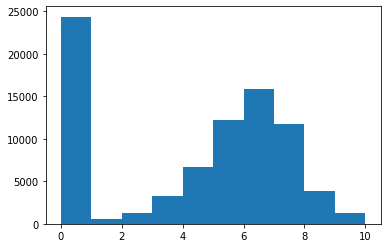

In [33]:
# 3 make a histogram of the 

plt.hist(data['average_rating'])
plt.show()

In [34]:
# Priint the first row of all the data with zero score
print(data[data['average_rating']==0].iloc[0])

# Priint the first row of data with score grather than zero
print(data[data['average_rating']>0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

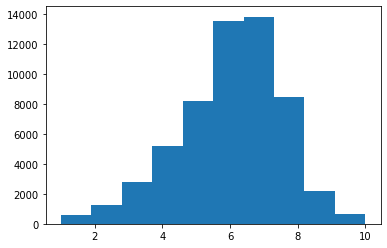

In [35]:
# Remove any row without user review
data = data[data['users_rated'] > 0]

# Remove any row with missing values
data = data.dropna(axis=0)

# make a histogram of all the average rating
plt.hist(data['average_rating'])
plt.show()

In [36]:
print(data.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


In [ ]:
import seaborn as sns

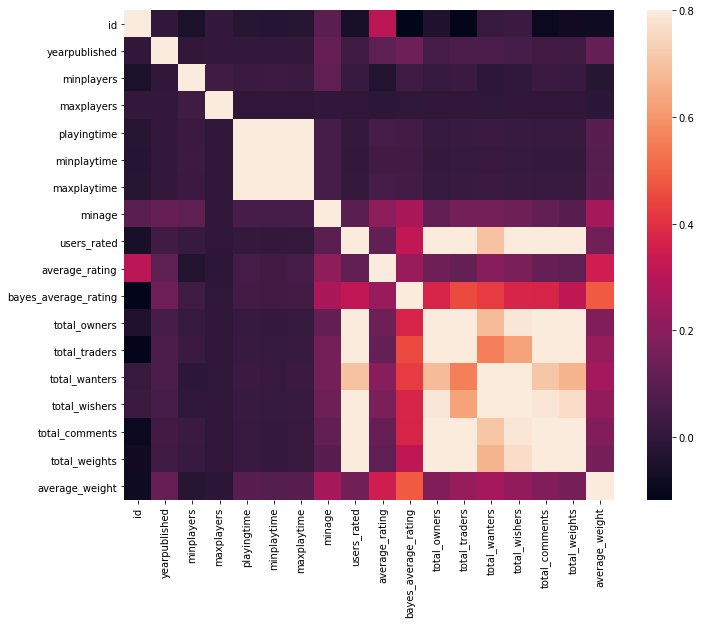

In [38]:
#  Correlation Matrix
corrmat = data.corr()
fig = plt.figure(figsize =(12,9))

sns.heatmap(corrmat, vmax =0.8, square = True)
plt.show()

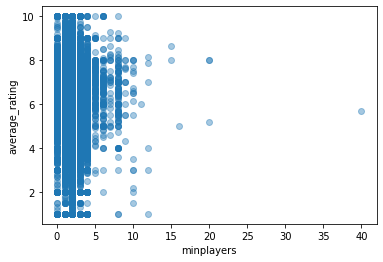

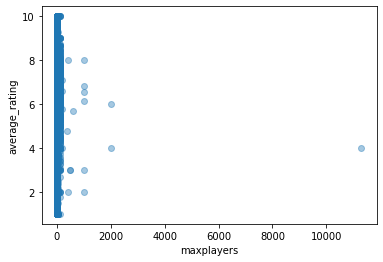

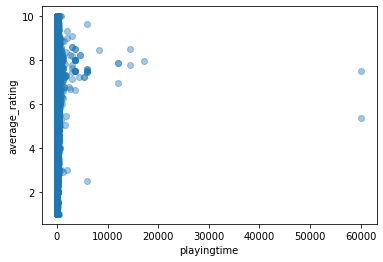

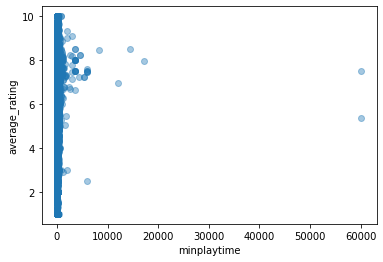

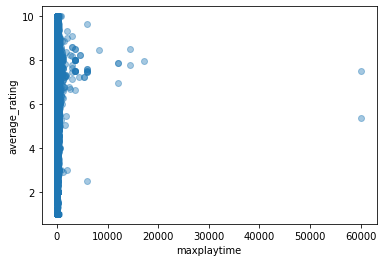

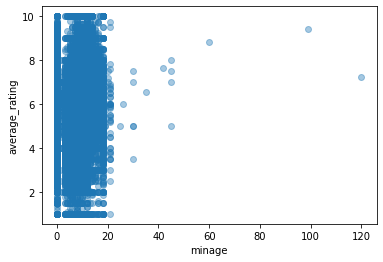

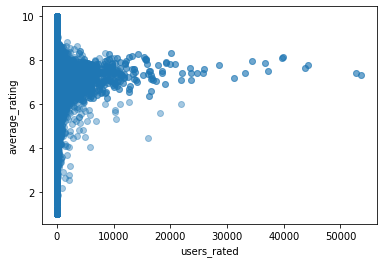

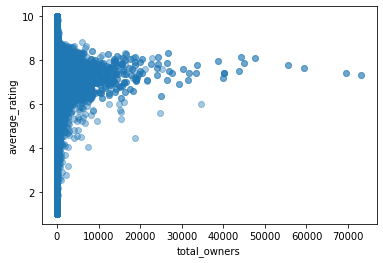

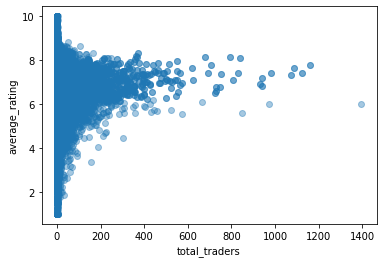

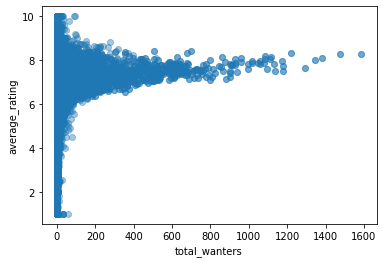

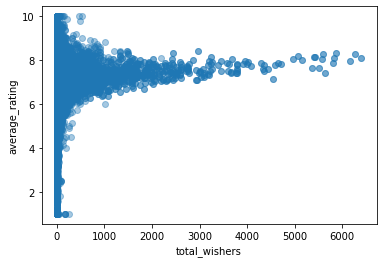

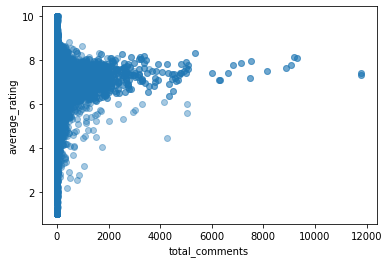

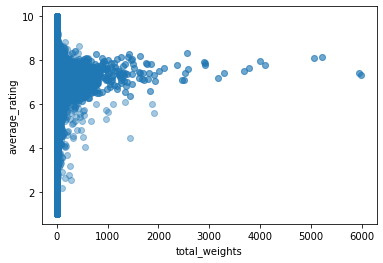

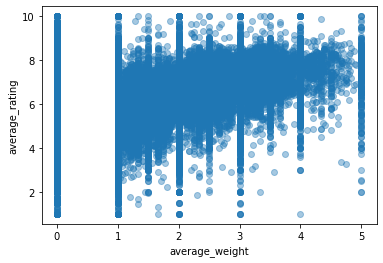

In [44]:
# Plotting scatter plots between 
for c in columns:
    plt.scatter(data[c],data[target], alpha = 0.4)
    plt.xlabel(c)
    plt.ylabel(target)
    plt.show()

**3. Data Preparation and Model Training**

In [ ]:
columns = data.columns.tolist()
# Filtering the columns to be removed
columns =  [c for c in columns if c not in ['id', 'name', 'type', 'average_rating', 'bayes_average_rating', 'yearpublished']]
target = 'average_rating'

In [ ]:
from sklearn.model_selection import train_test_split

In [43]:
# Generate training set
train = data.sample(frac=0.8, random_state=1)

# Select anything in not in training set and put in test
test = data.loc[~data.index.isin(train.index)]

print(train.shape)
print(test.shape)


(45515, 20)
(11379, 20)


**Linear Regression**

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model class
LR = LinearRegression()

# Fit the model the training data
LR.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
# Generate prediction for the test set
LR_prediction = LR.predict(test[columns])

# Compute error between our test predction and actual data
mean_squared_error(LR_prediction, test[target])

2.088312734369357

**Random Forest Regressor**

In [48]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model class
RFR = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state = 1)

# Fit the model the training data
RFR.fit(train[columns],train[target])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [49]:
# Generate prediction for the test set
RFR_prediction = RFR.predict(test[columns])

# Compute error between our test predction and actual data
mean_squared_error(RFR_prediction, test[target])

1.5689077717887692

In [50]:
test[columns].iloc[0]

minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [52]:
# Make prediction with both model
rating_LR = LR.predict(test[columns].iloc[0].values.reshape(1, -1))
rating_RFR = RFR.predict(test[columns].iloc[0].values.reshape(1, -1))

# Print the prediction
print(rating_LR)
print(rating_RFR)

[8.10709889]
[8.12876093]


In [53]:
test[target].iloc[0]

8.07933